<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/DeepLearning/02_pytorch_%EA%B8%B0%EC%B4%881.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch
- 구글의 tensorlow와 유사한 딥러닝 라이브러리
- 페이스북 인공지능 연구팀에 의해 주로 개발
- torch
    - 텐서 변환 및 다양한 수학 함수와 클래스가 들어가 있다.
- torch.nn
    - 신경망을 구축하기위한 레이어(층), 활성화 함수, 손실함수 등이 들어가 있다.
- torch.utils.data
    - 미니 배치 학습을 위한 데이터셋을 구성하는 클래스들이 들어가 있다.
- torch.optim
    - optimizer 관련된 함수와 클래스가 있다.
    

In [ ]:
import torch
# from torch import nn 이런식으로 사용하지만 익숙해지기 위해 위에 방법으로 사용
import numpy as np

# 텐서(Tensor)
- N-차원 배열
- 텐서는 다차원 배열이나 행렬과 매우 유사한 특수한 자료구조
- Pytorch 에서는 텐서를 딥러닝 모델의 입력과 출력으로 하여 학습을 진행

# 텐서 만들기

- tesnor 함수
    - 입력받은 데이터를 텐서 객체로 반환

In [ ]:
data = [
    [1,2,3],
    [4,5,6]
]
x = torch.tensor(data)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.dtype

torch.int64

In [ ]:
arr = np.array(data)
torch.tensor(arr)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

- Tensor 클래스
    - 입력받은 데이터를 객체로 반환
    - 다른점은 데이터 타입을 float32 로 변경해준다. (64는 두배로 늘어나는거기 때문에 학습이 안됨 너무커)


In [ ]:
x = torch.Tensor(arr)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
x.dtype

torch.float32

- 슬라이싱, 인덱싱, 마스킹
- ones., zeros

In [ ]:
x[:,1:]

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
x[:,:1]

tensor([[1.],
        [4.]])

In [ ]:
x[:1,1:]

tensor([[2., 3.]])

In [ ]:
x[x<3]

tensor([1., 2.])

In [ ]:
ones_tensor = torch.ones(2,3) # 2행 3열
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
zeros_tensor = torch.zeros(2,3) # 2행 3열
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.cat([ones_tensor,zeros_tensor],dim=1) # axis 대신 dim으로

tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])

# 차원 변경
- view 메소드
    - 원소의 순서대로 차원을 변경해서 반환

In [ ]:
x = torch.Tensor(arr)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
x_view = x.view(3,2) # 3행 2열로 바꾸겠다. 원소의 순서가 유지되면서 바뀜
x_view 

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
x_view[0,0] = 100

In [ ]:
x # 메모리를 공유하기 때문에 

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

In [ ]:
# x.reshape(3,2) # 복사본을 반환할지 원본메모리를 공유하는 것을 반환할지 알수 없다

- 복사하기

In [ ]:
x.clone()

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

- transpose 메소드
    - 차원 맞바꾸기
    - 두개의 차원만 가능
    

In [ ]:
x

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

In [ ]:
x.transpose(0,1) # 행이 열이되고 열이 행이 되는 형태

tensor([[100.,   4.],
        [  2.,   5.],
        [  3.,   6.]])

- permute 메소드
    - 여러개 차원 맞바꾸기
    

In [ ]:
arr = np.arange(1,25).reshape(2,3,4) # 2행 3행 4열
arr

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [ ]:
x = torch.Tensor(arr)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

In [ ]:
x.shape

torch.Size([2, 3, 4])

In [ ]:
x.permute(0,2,1).shape # 1번째 차원은 그대로 두고 두번째와 세번째를 마꾸겟다

torch.Size([2, 4, 3])

In [ ]:
x.permute(0,2,1)

tensor([[[ 1.,  5.,  9.],
         [ 2.,  6., 10.],
         [ 3.,  7., 11.],
         [ 4.,  8., 12.]],

        [[13., 17., 21.],
         [14., 18., 22.],
         [15., 19., 23.],
         [16., 20., 24.]]])

# 모델 학습에 사용할 CPU or GPU 장치 확인
 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu" # 장치에 gpu가 있다. true가 나오면
device

'cpu'

- 텐서를 gpu로 이동시키기


In [ ]:
x = x.to(device)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

- 텐서가 위치한 장치 확인하기

In [ ]:
x.device

device(type='cpu')

In [ ]:
x = x.to("cpu")
x.device

device(type='cpu')

In [ ]:
from google.colab import drive
drive.mount("/content/dirve")

Mounted at /content/dirve


In [ ]:
DATA_PATH = "/content/dirve/MyDrive/data/"

In [ ]:
# 아래 복붙
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
# 결측치 미리 채우기
df.age = df.age.fillna(df.age.median()) # age 중앙값
df.fare = df.fare.fillna(df.fare.median()) # fare 중앙값
df.cabin = df.cabin.fillna("UNK") # cabin 임의의 문자열로 채우기
df.embarked = df.embarked.fillna(df.embarked.mode()[0]) # embarked 최빈값
# 학습에 바로 사용가능한 특성
cols = ["pclass","age","sibsp","parch","fare"]
features = df[cols]
# 범주형 one-hot encoding
cols = ["gender","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
features = pd.concat([features,tmp],axis=1) # 특성
target = df["survived"].to_numpy() # 정답값
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
SEED = 42
# 학습 검증 나누기
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(features, target, random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((981, 10), (328, 10), (981,), (328,))

In [ ]:
features.shape

(1309, 10)

In [ ]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

# Dataset 와 DataLoader
- torch.utils.data.Dataset
    - 학습데이터와 정답을 저장해서 인덱싱을 통해 반환하는 클래스 
- torch.utils.data.DataLoader
    - Dataset의 데이터를 쉽게 접근 할수 있도록 iterable한 객체로 만들어 준다.


In [ ]:
# y_train.reshape(-1,1) # 파이토치는 1차원이 학습이 안되기 때문에 2차원형태로 만들어줘야함

In [ ]:
class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self,x,y = None): # 정답값이 없을 경우를 대비해서 
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.astype("float32").reshape(-1,1) # 2차원 형태로 변경
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self,idx):
        item = {}
        item["x"] = torch.Tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])

        return item

In [ ]:
x_train

array([[1.        , 0.27345609, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32356257, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.43630214, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.48640862, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.48014531, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.34861581, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
train_dt = TitanicDataset(x_train,y_train)
train_dt

In [ ]:
train_dt[0]

{'x': tensor([0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
         1.0000]), 'y': tensor([1.])}

In [ ]:
len(train_dt)

981

In [ ]:
train_dl = torch.utils.data.DataLoader(train_dt,batch_size=2,shuffle=False)
train_dl

In [ ]:
# for i in train_dl: # 이터러블 하니까 for문 가능
#     print(i)

In [ ]:
next(iter(train_dl)) # 잘꺼내지는지 확인할때 사용

{'x': tensor([[0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [1.0000, 0.5365, 0.1250, 0.6667, 0.0915, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000]]), 'y': tensor([[1.],
         [0.]])}

In [ ]:
# next(iter(train_dl))["x"]

# 모델 계층(Layer) 정의해보기
- torch.nn.Linear
    - 가중치와 편향을 사용해서 입력에 대해 선형변환 
    - in_features
        - 입력값의 개수
    - out_features
        - 출력값의 개수
        


In [ ]:
torch.manual_seed(SEED) # cpu 에 대한 랜덤값
torch.cuda.manual_seed(SEED) # gpu10
input_layer = torch.nn.Linear(x_train.shape[1],1) # in_features는 x_train.shape[1](피쳐의 수), out_features는 1로 하겠다.
data = next(iter(train_dl))
hidden_layer = input_layer(data["x"])
hidden_layer # batch_size = 2 ,두개씩 꺼내니까 값 두개. 시그모이드함수 통과하기 전.

tensor([[0.3096],
        [0.6673]], grad_fn=<AddmmBackward0>)

# 모델 만들기
- Pytorch 에서 신경말 모델은 torch.nn.Module을 상속받아서 클래스를 생성해서 정의
- `__init__` 메소드에서는 신경망의 계층들을 정의 
- `forward` 메소드에서는 신경망에서 텐서를 어떻게 전달할지를 지정

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__() # 부모클래스 초기화
        self.hidden_layer = torch.nn.Linear(in_features,1)
        # self.sig = torch.nn.Sigmoid()
    def forward(self,x):
        x = self.hidden_layer(x)
        # x = self.sig(x)
        return x

In [ ]:
model = LogisticRegression(x_train.shape[1])
model(data["x"])

tensor([[0.0070],
        [0.2196]], grad_fn=<AddmmBackward0>)

In [ ]:
x_train.shape

(981, 10)

# 모델 학습 

In [ ]:
batch_size = 32 # 미니 배치 사이즈

- 손실함수 객체 생성

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss() # 모델 출력에 시그모이드함수를 통과시켜 BCE 계산
loss_fn
# torch.nn.BCELoss() #시그모이드 함수 사용할경우

BCEWithLogitsLoss()

- 모델 객체 생성

In [ ]:
model = LogisticRegression(x_train.shape[1]).to(device)

- optimizer 객체 생성


In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

- 학습데이터 객체 생성

In [ ]:
train_dt = TitanicDataset(x_train,y_train)
train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle = True)

- 학습하기


In [ ]:
model.train()

epoch_loss = 0
for batch in train_dl:
    # print(batch["x"].shape)
    # break
    pred = model(batch["x"].to(device)) # gpu안에 학습데이터 모델을 넣어줌
    loss = loss_fn(pred,batch["y"].to(device)) # 손실값이 넘옴
    
    optimizer.zero_grad() # 경사를 0으로 초기화
    loss.backward() # 역전파 코드
    optimizer.step() # 가중치 업데이트


    epoch_loss += loss.item() # 값을 가져올때 item

epoch_loss /= len(train_dl)

print(f"epoch_loss: {epoch_loss}")

epoch_loss: 0.7615217739535917


- 학습 loop 함수화

In [ ]:
def train_loop(train_dl,model,device,optimizer,loss_fn):
    model.train()

    epoch_loss = 0
    for batch in train_dl:
        # print(batch["x"].shape)
        # break
        pred = model(batch["x"].to(device)) # gpu안에 학습데이터 모델을 넣어줌
        loss = loss_fn(pred,batch["y"].to(device)) # 손실값이 넘옴
        
        optimizer.zero_grad() # 경사를 0으로 초기화
        loss.backward() # 역전파 코드
        optimizer.step() # 가중치 업데이트


        epoch_loss += loss.item() # 값을 가져올때 item

    epoch_loss /= len(train_dl)

    return epoch_loss

In [ ]:
train_loop(train_dl,model,device,optimizer,loss_fn)

0.7423399283039954

- 검증셋에 대한 평가 loop 함수화

In [ ]:
@torch.no_grad() # with torch.no.grad() 와 같다
def test_loop(dataloader, model, loss_fn,device):
    epoch_loss = 0
    model.eval() # 평가할때 모델 모드를 eval로 꼭 변경해줘야함, 랜덤적인 요소를 없애기위해

    
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))
        epoch_loss += loss.item() # 값을 가져올때 item

    epoch_loss /= len(dataloader)
    return epoch_loss

In [ ]:
valid_dt = TitanicDataset(x_valid,y_valid)
valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False)

In [ ]:
test_loop(valid_dl,model,loss_fn,device)

0.7517904259941794

- 검증평가 뿐만 아니라 테스트데이터에 대한 예측만 해야하는 상황이라면?

In [ ]:
@torch.no_grad() # with torch.no.grad() 와 같다
def test_loop(dataloader, model, loss_fn,device):
    epoch_loss = 0
    model.eval() # 평가할때 모델 모드를 eval로 꼭 변경해줘야함, 랜덤적인 요소를 없애기위해

    pred_list = []
    sig = torch.nn.Sigmoid()
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None: # y값이 있을 경우만 loss 계산
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item() # 값을 가져올때 item
        
        pred = sig(pred) # 시그모이드 함수 통과, 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu 이동후 numpy 변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) #pred값이 있으니 auc도 확인가능

    return epoch_loss,pred

In [ ]:
x_test = x_valid.copy() # 테스트 데이터라고 가정하고 복사

In [ ]:
test_dt = TitanicDataset(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle=False)

_,pred = test_loop(test_dl,model,loss_fn,device)
pred

array([[0.43548584],
       [0.50419056],
       [0.43547758],
       [0.46744052],
       [0.37289846],
       [0.26883337],
       [0.37289846],
       [0.35799813],
       [0.31267574],
       [0.36820227],
       [0.43127477],
       [0.43652943],
       [0.4395618 ],
       [0.3198314 ],
       [0.43592188],
       [0.35671872],
       [0.37021402],
       [0.4354708 ],
       [0.40801257],
       [0.44177526],
       [0.4711563 ],
       [0.4391496 ],
       [0.42718893],
       [0.42771393],
       [0.4407235 ],
       [0.45517012],
       [0.43339115],
       [0.43762025],
       [0.46477994],
       [0.32468432],
       [0.43568015],
       [0.36222067],
       [0.3728993 ],
       [0.4301358 ],
       [0.4976283 ],
       [0.4899348 ],
       [0.37889856],
       [0.3114683 ],
       [0.43548125],
       [0.32646543],
       [0.5025921 ],
       [0.33414972],
       [0.37290213],
       [0.4286808 ],
       [0.44236574],
       [0.46511748],
       [0.42158246],
       [0.369

# 10에폭 학습 하고 검증평가해보기

In [ ]:
epochs = 10
for epoch in range(epochs):
    print(f"{epoch+1} epoch 시작")
    train_loss = train_loop(train_dl, model, device, optimizer, loss_fn)
    valid_loss , pred = test_loop(valid_dl, model, loss_fn, device)
    print(train_loss, valid_loss)

1 epoch 시작
0.7284330033486889 0.7388763644478538
2 epoch 시작
0.7147180226541334 0.7264711911028082
3 epoch 시작
0.7007835603529408 0.7149528319185431
4 epoch 시작
0.6898600939781435 0.7038845907558094
5 epoch 시작
0.6781554568198419 0.6928930553522977
6 epoch 시작
0.6673279058548712 0.682576445015994
7 epoch 시작
0.6592964856855331 0.6726287711750377
8 epoch 시작
0.6484159096594779 0.6627776189283892
9 epoch 시작
0.6379899747910038 0.6531625660982999
10 epoch 시작
0.6300130005805723 0.6440484957261519


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,pred)

0.7694036501724338

# 정리해보자


## dataset 정의


In [ ]:
class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self,x,y = None): # 정답값이 없을 경우를 대비해서 
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.astype("float32").reshape(-1,1) # 2차원 형태로 변경
    def __len__(self):
        return self.x.shape[0] # 데이터 샘플의 길이값 반환
    def __getitem__(self,idx):
        item = {}
        item["x"] = torch.Tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        return item

## 모델정의

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__() # 부모클래스 초기화
        self.hidden_layer = torch.nn.Linear(in_features,1) # 1을 줫을경우 노드가 하나 in_Feactures 10개가 out_features노드 1개에 연결
        # self.sig = torch.nn.Sigmoid()
    def forward(self,x):
        x = self.hidden_layer(x)
        # x = self.sig(x)
        return x

## 학습하는 함수 정의

In [ ]:
def train_loop(train_dl,model,device,optimizer,loss_fn):
    model.train()

    epoch_loss = 0
    for batch in train_dl:
        # print(batch["x"].shape)
        # break
        pred = model(batch["x"].to(device)) # gpu안에 학습데이터 모델을 넣어줌
        loss = loss_fn(pred,batch["y"].to(device)) # 손실값이 넘옴
        
        optimizer.zero_grad() # 경사를 0으로 초기화
        loss.backward() # 역전파 코드
        optimizer.step() # 가중치 업데이트


        epoch_loss += loss.item() # 값을 가져올때 item

    epoch_loss /= len(train_dl)

    return epoch_loss

## 평가 or 예측 하는 함수 정의

In [ ]:
@torch.no_grad() # with torch.no.grad() 와 같다
def test_loop(dataloader, model, loss_fn,device):
    epoch_loss = 0
    model.eval() # 평가할때 모델 모드를 eval로 꼭 변경해줘야함, 랜덤적인 요소를 없애기위해

    pred_list = []
    sig = torch.nn.Sigmoid()
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None: # y값이 있을 경우만 loss 계산
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item() # 값을 가져올때 item
        
        pred = sig(pred) # 시그모이드 함수 통과, 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu 이동후 numpy 변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) #pred값이 있으니 auc도 확인가능

    return epoch_loss,pred

## 학습에 필요한 손실과 최적화등 하이퍼파라미터 정의


In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
epoch = 1000
batch_size = 32
num_features = x_train.shape[1]

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle= True, random_state=SEED)

In [ ]:
features.shape , target.shape

((1309, 10), (1309,))

In [ ]:
is_holdout = True # 홀드아웃 하나로 체크해보고 점수가 괜찮으면 다섯개 다 돌려보자
for tri,vai in cv.split(features):
    # 학습데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증데이터
    x_valid = features[vai]
    y_valid = target[vai]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = TitanicDataset(x_train,y_train)
    valid_dt = TitanicDataset(x_valid,y_valid)

    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size,shuffle=True)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size,shuffle=False)

    train_loss_history = []
    valid_loss_history = []


    for e in range(epoch):
        train_loss = train_loop(train_dl, model, device, optimizer, loss_fn)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn , device)

        

        

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

    if is_holdout:
        break

- 시각화 해보기

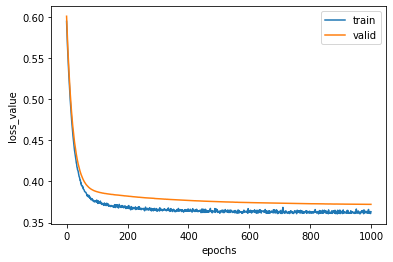

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(train_loss_history)
ax.plot(valid_loss_history)
ax.set_xlabel("epochs")
ax.set_ylabel("loss_value")
ax.legend(["train","valid"])
plt.show()

- 검증셋 평가 및 검증셋에 대한 AUC 개선이 없을 경우 조기 종료 조건주고 모델 가중치를 저장하기

In [ ]:
is_holdout = False # 홀드아웃 하나로 체크해보고 점수가 괜찮으면 다섯개 다 돌려보자
for i,(tri,vai) in enumerate(cv.split(features)): # 폴드 5개로 나눠
    # 학습데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증데이터
    x_valid = features[vai]
    y_valid = target[vai]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = TitanicDataset(x_train,y_train)
    valid_dt = TitanicDataset(x_valid,y_valid)

    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size,shuffle=True)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size,shuffle=False)

    best_score = 0
    patience = 0
    for e in range(epoch):
        train_loss = train_loop(train_dl, model, device, optimizer, loss_fn)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn , device)

        score = roc_auc_score(y_valid,pred)
        patience += 1 # 5번동안 갱신이 안됬을 경우, 반복문을 멈추기 위해서
        if best_score < score:
            patience = 0 # 갱신되면 초기화
            best_score = score
            torch.save(model.state_dict(),f"model_{i}.pth") # 저장하는 습관을 들이자 재현성을 검증하기위해 항상 저장!!!!!!!!!
       
        if patience == 5:
           break
        
    print(f"{i} 번째 폴드 AUC: {best_score}") # 폴드별 auc score 최고점수 갱신

     

    if is_holdout:
        break

0 번째 폴드 AUC: 0.8829455944312146
1 번째 폴드 AUC: 0.896429467871486
2 번째 폴드 AUC: 0.8862855357700719
3 번째 폴드 AUC: 0.9048713235294118
4 번째 폴드 AUC: 0.8917929292929293


In [ ]:
x_test.shape # 정답이 없는 테스트 셋이라고 가정

(328, 10)

- 저장된 모델 불러오고 추론하기

In [ ]:
test_dt = TitanicDataset(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle=False) # 예측하는데 섞을 필요없음 

In [ ]:
pred_list = []
for i in range(5):
    model = LogisticRegression(num_features).to(device)
    state_dict = torch.load(f"model_{i}.pth") # 가중치가 로드가 됨
    model.load_state_dict(state_dict)
    _,pred = test_loop(test_dl,model,loss_fn,device)
    pred_list.append(pred)
pred = np.mean(pred_list, axis = 0)
pred

array([[0.21984585],
       [0.29206133],
       [0.21981521],
       [0.25112122],
       [0.56901723],
       [0.57488954],
       [0.56901723],
       [0.5935812 ],
       [0.5487515 ],
       [0.24627304],
       [0.21853085],
       [0.22013874],
       [0.33338493],
       [0.6719295 ],
       [0.22146586],
       [0.5993741 ],
       [0.56377196],
       [0.21979013],
       [0.2811474 ],
       [0.2216963 ],
       [0.25249055],
       [0.2209092 ],
       [0.2175751 ],
       [0.21774623],
       [0.22137646],
       [0.43247136],
       [0.21922977],
       [0.217275  ],
       [0.25431117],
       [0.5348467 ],
       [0.22056606],
       [0.59475225],
       [0.5690223 ],
       [0.22117317],
       [0.3141759 ],
       [0.23819008],
       [0.5723166 ],
       [0.528134  ],
       [0.21982865],
       [0.5621179 ],
       [0.29133344],
       [0.5468529 ],
       [0.5690395 ],
       [0.2178417 ],
       [0.35874504],
       [0.24759884],
       [0.2130804 ],
       [0.243